In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
%matplotlib inline

In [2]:
!git clone https://github.com/rumeetsingh/my_dataset.git

Cloning into 'my_dataset'...
remote: Enumerating objects: 32434, done.
remote: Counting objects: 100% (32434/32434), done.
remote: Compressing objects: 100% (27589/27589), done.
remote: Total 32434 (delta 4845), reused 32433 (delta 4844), pack-reused 0
Receiving objects: 100% (32434/32434), 332.45 MiB | 37.63 MiB/s, done.
Resolving deltas: 100% (4845/4845), done.
Checking out files: 100% (32410/32410), done.


In [0]:
from dataloader import DataLoader

In [0]:
DIR = "my_dataset/MalariaCellImages"
CATEGORIES = ["Uninfected","Parasitized"]

In [0]:
my_data = DataLoader(DIR,CATEGORIES)

In [0]:
X_train, X_test, y_train, y_test = my_data.create_data(cmap='rgb',test_size=0.2,random_state=101,normalize=True,size_x=96,size_y=96)

In [7]:
X_train.shape

(22046, 96, 96, 3)

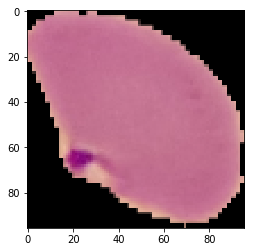

In [10]:
plt.imshow(X_train[1])

In [11]:
y_train[1]

1

In [40]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 96, 96, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 32)        9248      
__________

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

In [42]:
model.fit(X_train,
         y_train,
         batch_size=128,
         epochs=5)

Epoch 1/5
22046/22046 [==============================] - 21s 944us/sample - loss: 0.3444 - acc: 0.8364
Epoch 2/5
22046/22046 [==============================] - 20s 919us/sample - loss: 0.1493 - acc: 0.9527
Epoch 3/5
22046/22046 [==============================] - 20s 924us/sample - loss: 0.1321 - acc: 0.9576
Epoch 4/5
22046/22046 [==============================] - 20s 919us/sample - loss: 0.1268 - acc: 0.9582
Epoch 5/5
22046/22046 [==============================] - 20s 920us/sample - loss: 0.1218 - acc: 0.9583


In [125]:
model.evaluate(X_test,y_test)

5512/5512 [==============================] - 3s 527us/sample - loss: 0.1258 - acc: 0.9614


[0.1258089805484164, 0.96135706]

In [0]:
model.save("detecting_malaria_model.h5")